<a href="https://colab.research.google.com/github/thomas-barrais/Projet-Eolienne/blob/main/Groupe08_ProjetEol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://perso.univ-lemans.fr/~fcalvay/mnpm/projet-eolienne.pdf


<h1>
<li> Determination de l'angle de finesse optimale (Terminé) </li>
</h1>

Mounted at /content/gdrive/


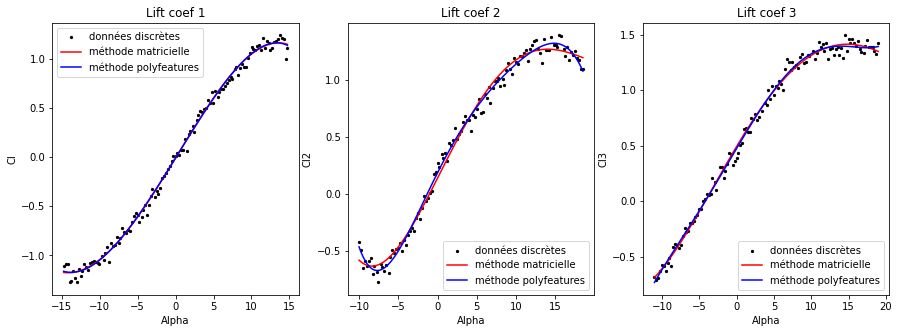

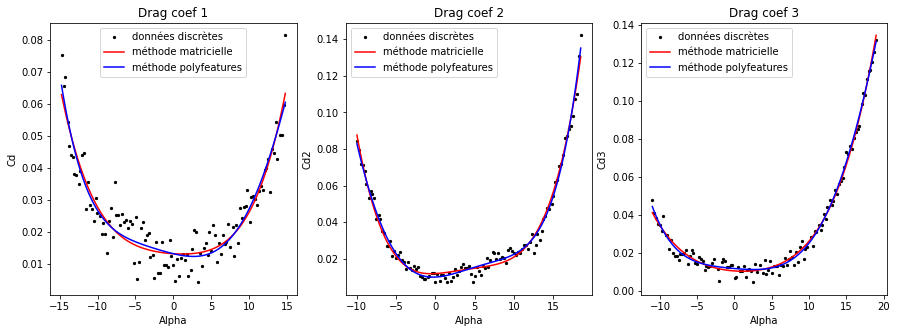

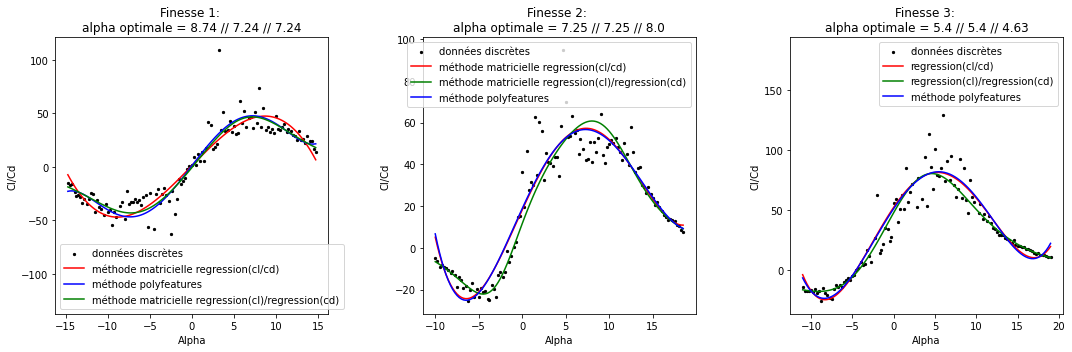

0.9919715485949477 0.017009791046806652


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

donnees = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_0012.txt', delimiter=',', names = True)
donnees2 = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_23012.txt', delimiter=',', names = True)
donnees3 = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_4412.txt', delimiter=',', names = True)

alpha=[]
cd=[]
cl=[]
for i in range(len(donnees)):
  alpha.append(donnees[i][0])
  cd.append(donnees[i][1])
  cl.append(donnees[i][2])

alpha=np.array(alpha)
cd=np.array(cd)
cl=np.array(cl)

alpha2=[]
cd2=[]
cl2=[]
for i in range(len(donnees2)):
  alpha2.append(donnees2[i][0])
  cd2.append(donnees2[i][1])
  cl2.append(donnees2[i][2])

alpha2=np.array(alpha2)
cd2=np.array(cd2)
cl2=np.array(cl2)

alpha3=[]
cd3=[]
cl3=[]
for i in range(len(donnees3)):
  alpha3.append(donnees3[i][0])
  cd3.append(donnees3[i][1])
  cl3.append(donnees3[i][2])

alpha3=np.array(alpha3)
cd3=np.array(cd3)
cl3=np.array(cl3)

def puissance(a, b):
  return np.power(a, b)

def polynomial_regression(X, y, degree):
    x_range = np.linspace(min(X), max(X), len(X))
    X=X.reshape(-1,1)
    for i in range(2, degree + 1):
        X = np.c_[X, puissance(X[:, 0],i)]

    # Ajout d'une colonne de 1 pour le terme constant
    X = np.c_[np.ones(X.shape[0]), X]

    # Calcul des coefficients de régression
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta[0] + beta[1]*x_range + beta[2]*np.power(x_range, 2) + beta[3]*np.power(x_range, 3) + beta[4]*np.power(x_range, 4)

def afficher_polynomial_regression(alpha, cl, cd, alpha2, cl2, cd2, alpha3, cl3, cd3, dg):
    
    # Calcul de la régression polynomiale avec la méthode matricielle
    x_range = np.linspace(min(alpha), max(alpha), 119)
    x_range2 = np.linspace(min(alpha2), max(alpha2), 115)
    x_range3 = np.linspace(min(alpha3), max(alpha3), 118)

    y_range_cl = polynomial_regression(alpha, cl, dg)
    y_range_cl_2 = polynomial_regression(alpha2, cl2, dg)
    y_range_cl_3 = polynomial_regression(alpha3, cl3, dg)

    y_range_cd = polynomial_regression(alpha, cd, dg)
    y_range_cd_2 = polynomial_regression(alpha2, cd2, dg)
    y_range_cd_3 = polynomial_regression(alpha3, cd3, dg)

    y_range_cl_cd = polynomial_regression(alpha, cl / cd, dg)
    y_range_cl_cd_2 = polynomial_regression(alpha2, cl2 / cd2, dg)
    y_range_cl_cd_3 = polynomial_regression(alpha3, cl3 / cd3, dg)

    imax_ = np.argmax(y_range_cl / y_range_cd)
    imax2_ = np.argmax(y_range_cl_2 / y_range_cd_2)
    imax3_ = np.argmax(y_range_cl_3 / y_range_cd_3)

    # Trouver l'indice de la valeur maximale dans chaque tableau
    imax = np.argmax(y_range_cl_cd)
    imax2 = np.argmax(y_range_cl_cd_2)
    imax3 = np.argmax(y_range_cl_cd_3)

    # Calcul de la régression polynomiale avec la méthode polyfeatures
    cdd, cdd2, cdd3 = cd.reshape(119, 1), cd2.reshape(115, 1), cd3.reshape(118, 1)
    cll, cll2, cll3 = cl.reshape(119, 1), cl2.reshape(115, 1), cl3.reshape(118, 1)
    alphaa, alphaa2, alphaa3 = alpha.reshape(119, 1), alpha2.reshape(115, 1), alpha3.reshape(118, 1)
    finesse, finesse2, finesse3 = cll/cdd, cll2/cdd2, cll3/cdd3

    poly_features = PolynomialFeatures(degree=5, include_bias=False)

    X_poly_cdd = poly_features.fit_transform(alphaa)
    X_poly_cll = poly_features.fit_transform(alphaa)
    X_poly_cdd2 = poly_features.fit_transform(alphaa2)
    X_poly_cll2 = poly_features.fit_transform(alphaa2)
    X_poly_cdd3 = poly_features.fit_transform(alphaa3)
    X_poly_cll3 = poly_features.fit_transform(alphaa3)

    reg_cdd = LinearRegression()
    reg_cdd.fit(X_poly_cdd, cdd)
    X_vals_cdd = x_range.reshape(-1, 1)
    X_vals_poly_cdd = poly_features.transform(X_vals_cdd)
    y_vals_cdd = reg_cdd.predict(X_vals_poly_cdd)

    reg_cll = LinearRegression()
    reg_cll.fit(X_poly_cll, cll)
    X_vals_cll = x_range.reshape(-1, 1)
    X_vals_poly_cll = poly_features.transform(X_vals_cll)
    y_vals_cll = reg_cll.predict(X_vals_poly_cll)

    reg_cll_cdd = LinearRegression()
    reg_cll_cdd.fit(X_poly_cll, cll / cdd)
    X_vals_cll_cdd = x_range.reshape(-1, 1)
    X_vals_poly_cll_cdd = poly_features.transform(X_vals_cll_cdd)
    y_vals_cll_cdd = reg_cll_cdd.predict(X_vals_poly_cll_cdd)

    reg_cdd2 = LinearRegression()
    reg_cdd2.fit(X_poly_cdd2, cdd2)
    X_vals_cdd2 = x_range2.reshape(-1, 1)
    X_vals_poly_cdd2 = poly_features.transform(X_vals_cdd2)
    y_vals_cdd2 = reg_cdd2.predict(X_vals_poly_cdd2)

    reg_cll2 = LinearRegression()
    reg_cll2.fit(X_poly_cll2, cll2)
    X_vals_cll2 = x_range2.reshape(-1, 1)
    X_vals_poly_cll2 = poly_features.transform(X_vals_cll2)
    y_vals_cll2 = reg_cll2.predict(X_vals_poly_cll2)

    reg_cll_cdd2 = LinearRegression()
    reg_cll_cdd2.fit(X_poly_cll2, cll2 / cdd2)
    X_vals_cll_cdd2 = x_range2.reshape(-1, 1)
    X_vals_poly_cll_cdd2 = poly_features.transform(X_vals_cll_cdd2)
    y_vals_cll_cdd2 = reg_cll_cdd2.predict(X_vals_poly_cll_cdd2)

    reg_cdd3 = LinearRegression()
    reg_cdd3.fit(X_poly_cdd3, cdd3)
    X_vals_cdd3 = x_range3.reshape(-1, 1)
    X_vals_poly_cdd3 = poly_features.transform(X_vals_cdd3)
    y_vals_cdd3 = reg_cdd3.predict(X_vals_poly_cdd3)

    reg_cll3 = LinearRegression()
    reg_cll3.fit(X_poly_cll3, cll3)
    X_vals_cll3 = x_range3.reshape(-1, 1)
    X_vals_poly_cll3 = poly_features.transform(X_vals_cll3)
    y_vals_cll3 = reg_cll3.predict(X_vals_poly_cll3)

    reg_cll_cdd3 = LinearRegression()
    reg_cll_cdd3.fit(X_poly_cll3, cll3 / cdd3)
    X_vals_cll_cdd3 = x_range3.reshape(-1, 1)
    X_vals_poly_cll_cdd3 = poly_features.transform(X_vals_cll_cdd3)
    y_vals_cll_cdd3 = reg_cll_cdd3.predict(X_vals_poly_cll_cdd3)

    y_cl_cd_poly = np.array(y_vals_cll_cdd)
    y_cl_cd2_poly = np.array(y_vals_cll_cdd2)
    y_cl_cd3_poly = np.array(y_vals_cll_cdd3)

    # Trouver l'indice de la valeur maximale dans chaque tableau
    indice_max = np.argmax(y_cl_cd_poly)
    indice_max2 = np.argmax(y_cl_cd2_poly)
    indice_max3 = np.argmax(y_cl_cd3_poly)

    # Affichage des données et de leurs régression polynomiale pour chaque grandeur aero
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].scatter(alpha, cl, s=5, color="black", label="données discrètes")
    axs[0].set_title('Lift coef 1')
    axs[0].set_xlabel('Alpha')
    axs[0].set_ylabel('Cl')
    axs[0].plot(x_range, y_range_cl, 'r', label='méthode matricielle')
    axs[0].plot(X_vals_cll, y_vals_cll, color='b', label='méthode polyfeatures')
    axs[0].legend()

    axs[1].scatter(alpha2, cl2, s=5, color="black", label="données discrètes")
    axs[1].set_title('Lift coef 2')
    axs[1].set_xlabel('Alpha')
    axs[1].set_ylabel('Cl2')
    axs[1].plot(x_range2, y_range_cl_2, 'r', label='méthode matricielle')
    axs[1].plot(X_vals_cll2, y_vals_cll2, color='b', label='méthode polyfeatures')
    axs[1].legend()

    axs[2].scatter(alpha3, cl3, s=5, color="black", label="données discrètes")
    axs[2].set_title('Lift coef 3')
    axs[2].set_xlabel('Alpha')
    axs[2].set_ylabel('Cl3')
    axs[2].plot(x_range3, y_range_cl_3, 'r', label='méthode matricielle')
    axs[2].plot(X_vals_cll3, y_vals_cll3, color='b', label='méthode polyfeatures')
    axs[2].legend()

    fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))
    axs2[0].scatter(alpha, cd, s=5, color="black", label="données discrètes")
    axs2[0].set_title('Drag coef 1')
    axs2[0].set_xlabel('Alpha')
    axs2[0].set_ylabel('Cd')
    axs2[0].plot(x_range, y_range_cd, 'r', label='méthode matricielle')
    axs2[0].plot(X_vals_cdd, y_vals_cdd, color='b', label='méthode polyfeatures')
    axs2[0].legend()

    axs2[1].scatter(alpha2, cd2, s=5, color="black", label="données discrètes")
    axs2[1].set_title('Drag coef 2')
    axs2[1].set_xlabel('Alpha')
    axs2[1].set_ylabel('Cd2')
    axs2[1].plot(x_range2, y_range_cd_2, 'r', label='méthode matricielle')
    axs2[1].plot(X_vals_cdd2, y_vals_cdd2, color='b', label='méthode polyfeatures')
    axs2[1].legend()

    axs2[2].scatter(alpha3, cd3, s=5, color="black", label="données discrètes")
    axs2[2].set_title('Drag coef 3')
    axs2[2].set_xlabel('Alpha')
    axs2[2].set_ylabel('Cd3')
    axs2[2].plot(x_range3, y_range_cd_3, 'r', label='méthode matricielle')
    axs2[2].plot(X_vals_cdd3, y_vals_cdd3, color='b', label='méthode polyfeatures')
    axs2[2].legend()

    # Affichage de la finesse et de l'angle de finesse optimale
    fig3, axs3 = plt.subplots(1, 3, figsize=(15, 5))
    axs3[0].scatter(alpha, cl/cd, s=5, color='black', label="données discrètes")
    axs3[0].set_title("Finesse 1: " + '\n' + "alpha optimale = " + str(round(x_range[imax], 2)) +" // "+ str(round(float(X_vals_cll_cdd[indice_max]), 2))+" // "+ str(round(x_range[imax_], 2)))
    axs3[0].set_xlabel('Alpha')
    axs3[0].set_ylabel('Cl/Cd')
    axs3[0].plot(x_range, y_range_cl_cd, 'r', label='méthode matricielle regression(cl/cd)')
    axs3[0].plot(X_vals_cll_cdd, y_vals_cll_cdd, 'b', label='méthode polyfeatures')
    axs3[0].plot(x_range, y_range_cl / y_range_cd, 'g', label='méthode matricielle regression(cl)/regression(cd)')
    axs3[0].legend()

    axs3[1].scatter(alpha2, cl2/cd2, s=5, color='black', label="données discrètes")
    axs3[1].set_title("Finesse 2: "  + '\n' + "alpha optimale = " + str(round(x_range2[imax2], 2)) +" // "+ str(round(float(X_vals_cll_cdd2[indice_max2]), 2))+" // "+ str(round(x_range2[imax2_], 2)))
    axs3[1].set_xlabel('Alpha')
    axs3[1].set_ylabel('Cl/Cd')
    axs3[1].plot(x_range2, y_range_cl_cd_2, 'r', label='méthode matricielle regression(cl/cd)')
    axs3[1].plot(x_range2, y_range_cl_2 / y_range_cd_2, 'g', label='méthode matricielle regression(cl)/regression(cd)')
    axs3[1].plot(X_vals_cll_cdd2, y_vals_cll_cdd2, 'b', label='méthode polyfeatures')
    axs3[1].legend()

    axs3[2].scatter(alpha3, cl3/cd3, s=5, color="black", label="données discrètes")
    axs3[2].set_title("Finesse 3: " + '\n' + "alpha optimale = " + str(round(x_range3[imax3], 2)) +" // "+ str(round(float(X_vals_cll_cdd3[indice_max3]), 2))+" // "+ str(round(x_range3[imax3_], 2)))
    axs3[2].set_xlabel('Alpha')
    axs3[2].set_ylabel('Cl/Cd')
    axs3[2].plot(x_range3, y_range_cl_cd_3, 'r', label='regression(cl/cd)')
    axs3[2].plot(x_range3, y_range_cl_3 / y_range_cd_3, 'g', label='regression(cl)/regression(cd)')
    axs3[2].plot(X_vals_cll_cdd3, y_vals_cll_cdd3, 'b', label='méthode polyfeatures')
    axs3[2].legend()
    
    plt.tight_layout()
    plt.show()
    s = (y_range_cl[imax] + y_range_cl_2[imax2] + y_range_cl_3[imax3])/3
    s2 = (y_range_cd[imax] + y_range_cd_2[imax2] + y_range_cd_3[imax3])/3
    print(s, s2)

afficher_polynomial_regression(alpha, cl, cd, alpha2, cl2, cd2, alpha3, cl3, cd3, 4)


In [ ]:
# def load_data(file_name):
#   data = np.genfromtxt('/content/gdrive/MyDrive/' + file_name, delimiter=',', names = True)
#   alpha = data['alpha']
#   cd = data['Cd']
#   cl = data['Cl']
#   return alpha, cd, cl

# data1 = load_data('naca_0012.txt')
# data2 = load_data('naca_23012.txt')
# data3 = load_data('naca_4412.txt')

# def polyfeatures(data, dg):
#   x_range = np.linspace(min(data['alpha']), max(data['alpha']), len(data['alpha']))
#   alpha = data['alpha'].reshape(len(data['alpha']), 1)
#   cd = data['Cd'].reshape(len(data['Cd']), 1)
#   cl = data['Cl'].reshape(len(data['Cl']), 1)
  
#   poly_features = PolynomialFeatures(degree=dg, include_bias=False)
#   X_poly_cd = poly_features.fit_transform(alpha)
#   reg_cd = LinearRegression()
#   reg_cd.fit(X_poly_cd, cd)
#   X_vals_cd = x_range.reshape(-1, 1)
#   X_vals_poly_cd = poly_features.transform(X_vals_cd)
#   y_vals_cd = reg_cd.predict(X_vals_poly_cd)
  
#   X_poly_cl = poly_features.fit_transform(alpha)
#   reg_cl = LinearRegression()
#   reg_cl.fit(X_poly_cl, cl)
#   X_vals_cl = x_range.reshape(-1, 1)
#   X_vals_poly_cl = poly_features.transform(X_vals_cl)
#   y_vals_cl = reg_cl.predict(X_vals_poly_cl)

#   return X_vals_cd, y_vals_cd, X_vals_cl, y_vals_cl

<h1> 
<li> Mise en évidence du décrochage (terminé)</li> 
</H1>

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
[-9.98364463025868, -9.74672815492012, -9.49496860243468, -9.25950305151568, -8.98889128702782, -8.77140824737676, -8.5070407955847, -8.22565572648871, -8.02108124628073, -7.753823684185, -7.52684560028123, -7.23402123988707, -7.02054644464388, -6.75567428868966, -6.49729776481098, -6.21961760511241, -5.99675549217304, -5.77135280682208, -5.53397834820204, -5.24559411968098, -4.98391685231639, -4.7605663513451, -4.49890784859399, -4.21354298537169, -3.9821367779416, -3.76743120082441, -3.50215636216024, -3.24572000104783, -3.0096689932058, -2.73246285312324, -2.5129449577811, -2.24308870896449, -1.97701969053104, -1.74942388825722, -1.47953258502806, -1.27380648609963, -0.987796999052476, -0.750446230358509, -0.493512276459642, -0.218784525886786, 0.00990689584161937, 0.240569784309385, 0.53877766498886, 0.744164197984054, 0.982642014852183, 1.26097625242

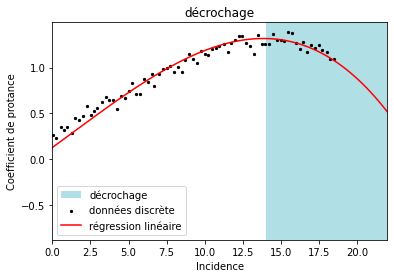

In [ ]:
from ast import Num
from google.colab import drive
drive.mount('/content/gdrive/')
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

donnees2 = np.genfromtxt ('/content/gdrive/MyDrive/'+'naca_23012.txt', delimiter=',', names = True)

alpha=[]
cl=[]
for i in range(len(donnees2)):
  alpha.append(donnees2[i][0])
  cl.append(donnees2[i][2])

x=np.array(alpha)
y2=np.array(cl)

def puissance(x, y):
  return np.power(x, y)

# regression lineaire
def polynomial_regression(X, y, degree):
    X=X.reshape(-1,1)
    for i in range(2, degree + 1):
        X = np.c_[X, puissance(X[:, 0],i)]

    # Ajout d'une colonne de 1 pour le terme constant
    X = np.c_[np.ones(X.shape[0]), X]

    # Calcul des coefficients de régression
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

beta = polynomial_regression(x, y2, 3)
x_range = np.linspace(min(alpha), 22, 119)
y_range = beta[0] + beta[1]*x_range + beta[2]*puissance(x_range, 2) + beta[3]*puissance(x_range, 3)

# Affichage du décrochage
plt.xlabel('Incidence')
plt.ylabel('Coefficient de protance')
plt.title('décrochage')
plt.xlim(0, 22)
ax = plt.gca()
ax.axvspan(14, 22, facecolor='powderblue', label='décrochage')
plt.scatter(x, y2, s=5, color='black', label='données discrète')
plt.plot(x_range, y_range, color='r', label='régression linéaire')
plt.legend()
plt.show()

<h1> # Calcul de Force </h1>

<p> <li> dFl = ρ * V^2 * Cl * dS * dr </li> <br> <li> dFp = ρ * V^2 * Cd * dS * dr </li> <br> dr est la différence de hauteur entre les deux points considérés <br><br> <li> La force totale de portance Fl est donnée par : </li> <ul> Fl = ∫ρ * V^2 * Cl * dS * dr </ul> <li> La force totale de traînée Fd est donnée par : </li> <ul> Fd = ∫ρ * V^2 * Cd * dS * dr </ul> </p>



<h1> Couple résultant + Puissance </h1>

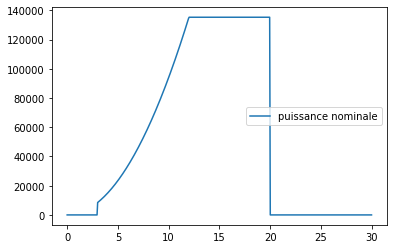

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rayon(R, taille):
  r = np.linspace(0, taille, 1000)
  res = -R / taille * r + R
  res = list(res)
  return res

def force(U, cl, cd, rho, f, corde, alpha, taille):
  Vr = 6 * U * np.sin(np.deg2rad(alpha))
  rayonn = rayon(corde, taille)
  Fl = 0
  Fd = 0
  for i in range(len(rayonn)):
    Fl += 0.5 * rho * np.power(Vr, 2) * np.pi * np.power(rayonn[i], 2) / f * cl
    Fd += 0.5 * rho * np.power(Vr, 2) * np.pi * np.power(rayonn[i], 2) / f * cd
    i+=1
  Fl = Fl * np.sin(np.deg2rad(alpha))
  Fd = - Fd * np.cos(np.deg2rad(alpha))
  Resultante = np.sqrt(Fl**2 - Fd**2)
  return Resultante

def couple(taille, Vr):
  corde = 0.3 * taille 
  strenght = force(Vr, 0.99, 0.017, 1.225, 16, corde, 6, taille)
  torque = strenght * taille / 2
  return torque

def puissance_nominale(taille, omega, Vr):
  torque = couple(taille, Vr)
  beltz = 0.6
  return torque * omega * beltz

#puissance(100)

vitesse_vent = np.linspace(0, 30, 500) 
#r_omega = np.linspace(0, 150, 100) 

cut_in_speed = 3
cut_speed = 12
cut_out_speed = 20
puissances = []
longueur_pale = 6

for v in vitesse_vent :
    if v < cut_in_speed:
        puissances.append(0)
    elif v >= cut_in_speed and v < cut_speed:
        puissances.append(puissance_nominale(longueur_pale, 100, v))
    elif v >= cut_speed and v < cut_out_speed:
        puissances.append(puissance_nominale(longueur_pale, 100, cut_speed))
    elif v >= cut_out_speed:
        puissances.append(0)

#print(puissances)
plt.plot(vitesse_vent, puissances, label="puissance nominale")
plt.legend()
plt.show()

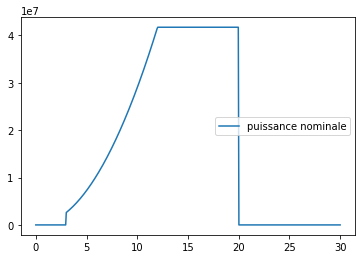

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def force(U, cl, cd, rho, f, corde, alpha, taille):
  Vr = 6 * U * np.sin(np.deg2rad(alpha))
  Fl = 0
  Fd = 0
  #for i in range(len(rayonn)):
  Fl = 0.5 * rho * np.power(Vr, 2) * np.pi * taille**2 * cl
  Fd = 0.5 * rho * np.power(Vr, 2) * np.pi * taille**2 * cd
  Fl = Fl * np.sin(np.deg2rad(alpha)) 
  Fd = - Fd * np.cos(np.deg2rad(alpha))
  Resultante = np.sqrt(Fl**2 - Fd**2)
  return Resultante

def couple(taille, Vr):
  corde = 0.5 * taille 
  strenght = force(Vr, 0.99, 0.017, 1.225, 16, corde, 6, taille)
  torque = strenght * taille / 2
  return torque

def puissance_nominale(taille, omega, Vr):
  torque = couple(taille, Vr)
  beltz = 0.6
  return torque * omega * beltz

#puissance(100)

vitesse_vent = np.linspace(0, 30, 500) 
#r_omega = np.linspace(0, 150, 100) 

cut_in_speed = 3
cut_speed = 12
cut_out_speed = 20
puissances = []
longueur_pale = 50

for v in vitesse_vent :
    if v < cut_in_speed:
        puissances.append(0)
    elif v >= cut_in_speed and v < cut_speed:
        puissances.append(puissance_nominale(longueur_pale, 100, v))
    elif v >= cut_speed and v < cut_out_speed:
        puissances.append(puissance_nominale(longueur_pale, 100, cut_speed))
    elif v >= cut_out_speed:
        puissances.append(0)

#print(puissances)
plt.plot(vitesse_vent, puissances, label="puissance nominale")
plt.legend()
plt.show()